In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load your wine dataset
df = pd.read_csv('./datasets/wine.csv')

In [11]:
# Separating features and target variable
X = df.drop(columns=['Customer_Segment'])  # Features (measurements)
y = df['Customer_Segment']  # Target variable (Type of wine)

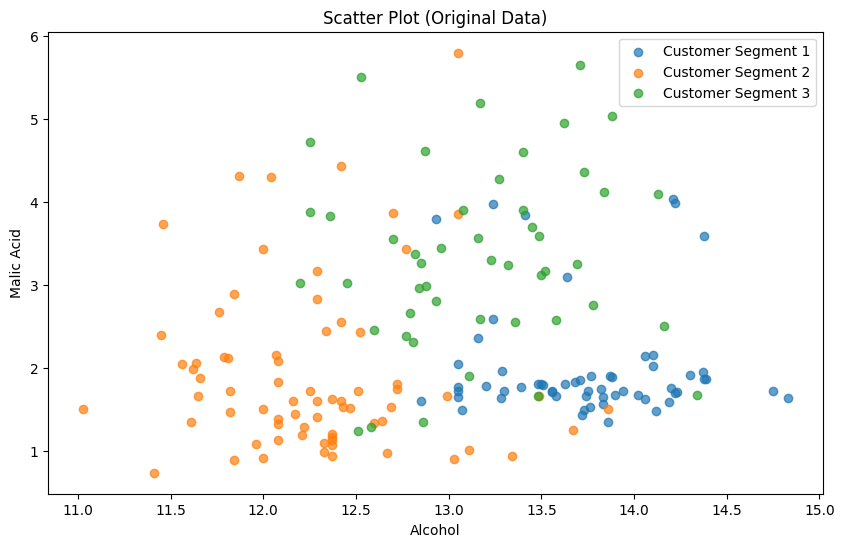

In [12]:
# Scatter plot before applying PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label='Customer Segment 1', alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Create a new DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y

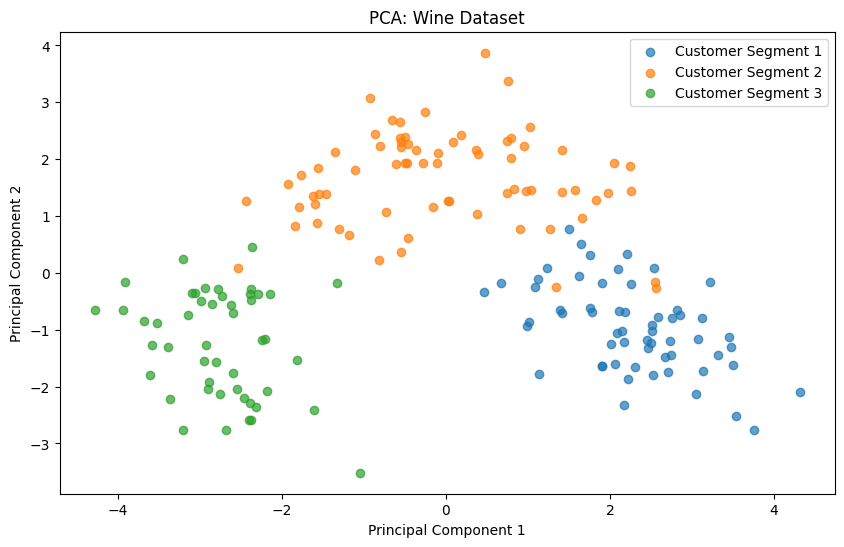

In [16]:
# Visualize the data using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 2'], label='Customer Segment 1', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 2'], label='Customer Segment 2', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 2'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Wine Dataset')
plt.show()

In [2]:
# PCA on Wine Dataset for Dimensionality Reduction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
# Load dataset
url = "./datasets/wine.csv"
data = pd.read_csv(url)

In [9]:
# Separate features and target
X = data.drop('Customer_Segment', axis=1)
y = data['Customer_Segment']

In [10]:
# Step 1: Standardize data
X_meaned = X - np.mean(X, axis=0)
cov_mat = np.cov(X_meaned, rowvar=False)

In [11]:
# Step 2: Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

In [12]:
# Step 3: Sort eigenvectors by descending eigenvalues
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[:, sorted_index]

In [13]:
# Step 4: Select top 2 eigenvectors
n_components = 2
eigenvector_subset = eigen_vectors[:, :n_components]

In [14]:
# Step 5: Transform the data
X_reduced = np.dot(X_meaned, eigenvector_subset)

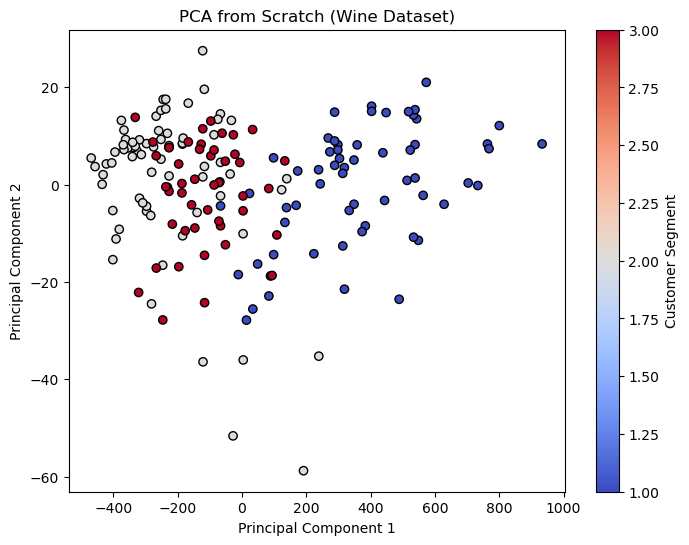

In [15]:
# Step 6: Plot the reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('PCA from Scratch (Wine Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Customer Segment')
plt.show()

In [16]:
# Standardize the dataset by subtracting mean.

# Compute covariance matrix to capture relationships between variables.

# Find eigenvalues & eigenvectors to identify principal directions.

# Sort eigenvectors by eigenvalues (most variance first).

# Project data onto top components → reduced dataset.